# <center><span style="font-size:100px ; color:blue">Projet 05:</span> </center>

##  <center><span style="font-size:50px ; color:"> Optimisez la gestion des données d'une boutique avec <span style="font-size:50px ; color:red">R</span> ou <span style="font-size:50px ; color:red">Python</span></center>

# Sommaire:
1. [Importation des librairies](#1.-Importation-des-librairies)  
2. [Importation des données](#2.-Importation-des-données)  
   2.1. [Data ERP](#2.1.-Data-ERP)  
   2.2. [Data WEB](#2.2.-Data-WEB)  
   2.3. [Data LIAISON](#2.3.-Data-LIAISON)  
3. [Jointure des DataFrames](#3.-Jointure-des-DataFrames)  
4. [Chiffre d'affaire](#4.-chiffre-d'affaire)  
  4.1. [Chiffre d'affaire par produit vendu sur web](#4.1.-Chiffre-d'affaire-par-produit-vendu-sur-web)  
  4.2. [Courbe de Lorenz](#4.2.-Courbe-de-Lorenz)  
  4.3. [Recherche valeurs abbérantes](#4.3.-Recherches-des-valeurs-abbérantes)  
      4.3.1. [Valeurs abbérantes: Z-score](#4.3.1.-Valeurs-abbérantes:-Z-score)  
      4.3.2. [Valeurs abbérantes: Interquartiles](#4.3.2.-Valeurs-abérantes-:-Inter-quartiles)  
5. [Conclusion](#5.-Conclusion)

# 1. Importation des librairies
↺ [Sommaire](#Sommaire:)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import re

# 2. Importation des données


## 2.1. Data ERP
↺ [Sommaire](#Sommaire:)

In [2]:
# Affichage des données ERP
erp = pd.read_excel('erp.xlsx')
erp

C:\Users\Dell\anaconda3\envs\projet5\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [3]:
erp = erp.rename(columns={
    'product_id': 'id_produit',
    'onsale_web': 'vente_web',
    'price': 'prix',
    'stock_quantity': 'etat_stock',
    'stock_status': 'disponibilité'
})
erp

,id_produit,vente_web,prix,etat_stock,disponibilité
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [4]:
# Vérification des types de données contenus dans les colonnes
erp.dtypes

id_produit         int64
vente_web          int64
prix             float64
etat_stock         int64
disponibilité     object
dtype: object

In [5]:
# Recherche des valeurs nulles
erp.isna().sum()

id_produit       0
vente_web        0
prix             0
etat_stock       0
disponibilité    0
dtype: int64

In [6]:
# Recherche des doublons
erp.duplicated(subset=['id_produit']).sum()

0

In [7]:
# Vérification des valeurs du colonne 'stock_status'
erp['disponibilité'].unique()

array(['outofstock', 'instock'], dtype=object)

In [8]:
# Vérification de l'occurence des valeurs du colonne 'stock_status'
erp['disponibilité'].value_counts()

instock       638
outofstock    187
Name: disponibilité, dtype: int64

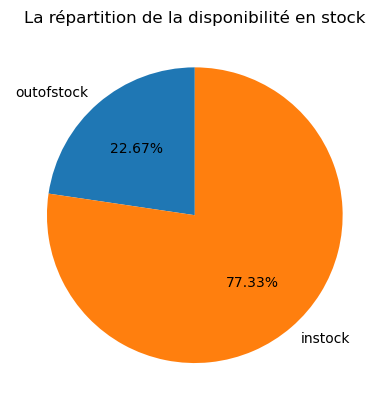

In [9]:
# Données pour le pie chart
labels = ['outofstock', 'instock']
sizes = [erp['disponibilité'][erp['disponibilité'] == 'outofstock'].count(), erp['disponibilité'][erp['disponibilité'] == 'instock'].count()]

# Couleurs pour chaque partie du pie chart
colors = ['orange', 'lightblue']

# Création du pie chart
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)

# Ajout d'un titre
plt.title('La répartition de la disponibilité en stock')

# Affichage du graphique
plt.show()

22,67% des produits sont indisponible en stock

In [10]:
# Vérification des valeurs du colonne 'onsale_web'
erp['vente_web'].unique()

array([1, 0], dtype=int64)

In [11]:
# Vérification de l'occurence des valeurs du colonne 'onsale_web'
erp['vente_web'].value_counts()

1    717
0    108
Name: vente_web, dtype: int64

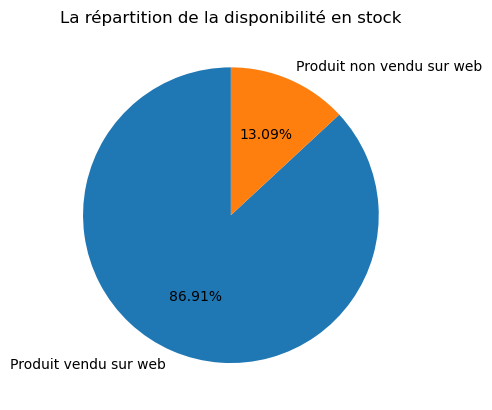

In [12]:
# Données pour le pie chart
labels = ['Produit vendu sur web', 'Produit non vendu sur web']
sizes = [erp['vente_web'][erp['vente_web']==1].count(), erp['vente_web'][erp['vente_web']==0].count()]

# Couleurs pour chaque partie du pie chart
colors = ['orange', 'lightblue']

# Création du pie chart
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)

# Ajout d'un titre
plt.title('La répartition de la disponibilité en stock')

# Affichage du graphique
plt.show()

13,09% des produits dans la table erp ne sont pas vendu sur web

In [13]:
#Vérification des informations Data ERP
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_produit     825 non-null    int64  
 1   vente_web      825 non-null    int64  
 2   prix           825 non-null    float64
 3   etat_stock     825 non-null    int64  
 4   disponibilité  825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


Le dataframe <span style="color:blue"><b>erp</b></span> n'a pas de doublons ni de données manquantes.
Au niveau de lq colonne <span style="color:red"><b>id_produit<b></span> il n'y a pas de valeurs manquantes. 

La colonne contient 825 valeurs uniques <span style="color:green"><b>(nombre de lignes de erp)</b></span>. 
On considére <span style="color:red"><b>id_produit</b></span> une clé primaire du dataframe <span style="color:blue"><b>erp</b></span>.On considére <span style="color:red"><b>id_produit</b></span> une clé primaire du dataframe <span style="color:blue"><b>erp</b></span>.

In [14]:
# Table descriptive des données ERP colonne price
erp[['prix']].describe()

,prix
count,825.000000
mean,32.415636
std,26.795849
min,5.200000
25%,14.600000
50%,24.400000
75%,42.000000
max,225.000000


# 2.2. Data WEB
↺ [Sommaire](#Sommaire:)

In [15]:
# Importation Data
web = pd.read_excel('web.xlsx')
# Changement nom colonne 'sku' vers 'SKU'
web = web.rename(columns = {'sku':'SKU',
                            'total_sales':'nb_ventes',
                            'post_date':'date',
                            'post_name':'nom_produit',
                            'post_type':'type_produit'
                           })
web

C:\Users\Dell\anaconda3\envs\projet5\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,SKU,virtual,downloadable,rating_count,average_rating,nb_ventes,tax_status,tax_class,post_author,date,...,nom_produit,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,type_produit,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [16]:
# Selection des lignes du dataframe 'exp_web' ou 'post_type'=product
web=web[web['type_produit']=='product']
web

,SKU,virtual,downloadable,rating_count,average_rating,nb_ventes,tax_status,tax_class,post_author,date,...,nom_produit,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,type_produit,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [17]:
# Vérification des types de données contenus dans les colonnes
web.dtypes

SKU                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
nb_ventes                       float64
tax_status                       object
tax_class                       float64
post_author                     float64
date                     datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
nom_produit                      object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [18]:
# Recherche des valeurs nulles
web.isna().sum()

SKU                        2
virtual                    0
downloadable               0
rating_count               0
average_rating             0
nb_ventes                  0
tax_status                 0
tax_class                716
post_author                0
date                       0
post_date_gmt              0
post_content             716
post_title                 0
post_excerpt               0
post_status                0
comment_status             0
ping_status                0
post_password            716
nom_produit                0
post_modified              0
post_modified_gmt          0
post_content_filtered    716
post_parent                0
guid                       0
menu_order                 0
type_produit               0
post_mime_type           716
comment_count              0
dtype: int64

In [19]:
# Supression des valeurs manquantes 'SKU'
web = web.dropna(subset='SKU')
web

,SKU,virtual,downloadable,rating_count,average_rating,nb_ventes,tax_status,tax_class,post_author,date,...,nom_produit,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,type_produit,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [20]:
# Table descriptive des données web colonne total_sales (colonne pertinente pour calcul du chiffre d'affaire)
web[['nb_ventes']].describe()

,nb_ventes
count,714.000000
mean,4.012605
std,8.518183
min,0.000000
25%,0.000000
50%,1.000000
75%,4.000000
max,96.000000


# 2.3. Data LIAISON
↺ [Sommaire](#Sommaire:)

In [21]:
# Importation Data
liaison = pd.read_excel('liaison.xlsx')
#Changement du Nom de la colonne id_web vers 'SKU'
liaison = liaison.rename(columns = {'product_id':'id_produit', 'id_web':'SKU'})
liaison

C:\Users\Dell\anaconda3\envs\projet5\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,id_produit,SKU
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [22]:
# Véréfication des types de contenu des colonnes
liaison.dtypes

id_produit     int64
SKU           object
dtype: object

In [23]:
# Recherche des valeurs nulles 
liaison.isna().sum()

id_produit     0
SKU           91
dtype: int64

In [24]:
# Recherche des doublons
liaison.duplicated(subset=['id_produit','SKU']).sum()

0

In [25]:
liaison['id_produit'].duplicated().sum()

0

In [26]:
liaison['SKU'].duplicated().sum()

90

In [27]:
liaison[liaison['SKU'].duplicated()==True]

,id_produit,SKU
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
151,4233,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [28]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_produit  825 non-null    int64 
 1   SKU         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


La colonne <span style="color:red"><b>id_produit</b></span> du dataframe <span style="color:blue"><b>liaison</b></span> ne contient pas de valeurs manquantes. Par contre dans la colonne <span style="color:red"><b>'SKU'</b></span> on trouve 734 valeurs uniques sur 825 lignes, les 91 autres valeurs sont en réalité des valeurs manquantes <b>(NaN)</b> on les supprime. C'est à dire 91 produits identifiés par la colonne <span style="color:red"><b>id_produit</b></span> ne sont pas référenciés dans le dataframe exp_web.

In [29]:
# Affichage des lignes 'liaison' à supprimer
liaison[liaison['SKU'].isna()]

,id_produit,SKU
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [30]:
# Suppression des liaison['SKU']=NaN
liaison = liaison.dropna()
liaison.isna().sum()

id_produit    0
SKU           0
dtype: int64

In [31]:
# Affichage du dataframe 'liaison' nettoyé
liaison

,id_produit,SKU
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


# 3. Jointure des DataFrames
↺ [Sommaire](#Sommaire:)

In [32]:
# jointure gauche 'exp_erp' et 'df_lia' pour selectionner que les id_produit associés a SKU (tous les lignes de la table liaison)
erp_liaison = pd.merge(erp,liaison,on='id_produit',how='right')
erp_liaison

,id_produit,vente_web,prix,etat_stock,disponibilité,SKU
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
729,7023,1,27.5,15,instock,15891
730,7025,1,69.0,2,instock,15887
731,7247,1,54.8,23,instock,13127-1
732,7329,0,26.5,14,instock,14680-1


In [33]:
erp_liaison['vente_web'].unique()

array([1, 0], dtype=int64)

In [34]:
# Nombre des produits non vendus sur web
erp_liaison['vente_web'][erp_liaison['vente_web']==erp_liaison['vente_web'].unique()[1]].count()

20

In [35]:
# Affichage des lignes des 20 produits non vendus sur web de la jointure erp_liaison
erp_liaison[erp_liaison['vente_web']==erp_liaison['vente_web'].unique()[1]]

,id_produit,vente_web,prix,etat_stock,disponibilité,SKU
185,4289,0,22.8,0,outofstock,13771
227,4568,0,21.5,0,outofstock,15065
230,4584,0,32.3,0,outofstock,14785
334,4741,0,12.4,0,outofstock,12601
368,4864,0,8.3,0,outofstock,15154
371,4869,0,17.2,0,outofstock,14360
399,4921,0,13.8,0,outofstock,15608
400,4922,0,21.5,0,outofstock,15586
443,5018,0,15.4,0,outofstock,15272
445,5021,0,17.1,0,outofstock,15630


In [36]:
# Nombre de lignes nettoyées sur les produits vendus en lignes dans la jointure erp_liaison
erp_liaison['vente_web'][erp_liaison['vente_web']==erp_liaison['vente_web'].unique()[0]].count()

714

In [37]:
# Les informations nettoyées sur les produits vendus en lignes de la jointure erp_liaison
erp_liaison[erp_liaison['vente_web']==erp_liaison['vente_web'].unique()[0]]

,id_produit,vente_web,prix,etat_stock,disponibilité,SKU
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
728,6930,1,8.4,83,instock,16135
729,7023,1,27.5,15,instock,15891
730,7025,1,69.0,2,instock,15887
731,7247,1,54.8,23,instock,13127-1


La table de jointure <span style="color:blue"><b>erp_liaison</b></span> contient 20 produit qui ne sont pas vendus sur le web <b>(la colonne <span style="color:red">'vente_web'</span> contient valeur 1)</b>. En les supprimmant on aura une table de 714 lignes

In [38]:
#Jointure externe expor(exp_erp,df_lia) et exp_web pour selection des lignes qui ne sont
erp_liaison_web = pd.merge(erp_liaison,web,how='outer')
erp_liaison_web = erp_liaison_web[['id_produit','SKU', 'nom_produit','date', 'vente_web', 'etat_stock', 'disponibilité', 'nb_ventes', 'prix']]
erp_liaison_web

,id_produit,SKU,nom_produit,date,vente_web,etat_stock,disponibilité,nb_ventes,prix
0,3847,15298,pierre-jean-villa-saint-joseph-preface-2018,2018-02-08 12:58:52,1,0,outofstock,6.0,24.2
1,3849,15296,pierre-jean-villa-saint-joseph-tilde-2017,2018-02-08 13:49:41,1,0,outofstock,0.0,34.3
2,3850,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,2018-02-08 14:08:36,1,0,outofstock,0.0,20.8
3,4032,19814,pierre-jean-villa-igp-gamine-2018,2018-02-09 14:01:05,1,0,outofstock,3.0,14.1
4,4039,19815,pierre-jean-villa-cote-rotie-carmina-2017,2018-02-12 09:04:37,1,0,outofstock,0.0,46.0
...,...,...,...,...,...,...,...,...,...
729,7023,15891,camin-larredya-jurancon-sec-la-virada-2018,2020-05-02 14:53:40,1,15,instock,0.0,27.5
730,7025,15887,jamet-cote-rotie-fructus-voluptas-2018,2020-05-02 15:00:54,1,2,instock,0.0,69.0
731,7247,13127-1,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-06-09 15:42:04,1,23,instock,0.0,54.8
732,7329,14680-1,NaN,NaT,0,14,instock,NaN,26.5


In [39]:
# vérification d'existance des doublons ['product_id','SKU']
erp_liaison_web.duplicated(subset=['id_produit','SKU']).sum()

0

In [40]:
# Vérification des valeurs du colonne 'onsale_web'
erp_liaison_web['vente_web'].unique()

array([1, 0], dtype=int64)

In [41]:
erp_liaison_web['vente_web'][erp_liaison_web['vente_web']==erp_liaison_web['vente_web'].unique()[1]].count()

20

In [42]:
# Affichage des lignes à supprimer
erp_liaison_web[erp_liaison_web['nom_produit'].isna()]

,id_produit,SKU,nom_produit,date,vente_web,etat_stock,disponibilité,nb_ventes,prix
185,4289,13771,NaN,NaT,0,0,outofstock,NaN,22.8
227,4568,15065,NaN,NaT,0,0,outofstock,NaN,21.5
230,4584,14785,NaN,NaT,0,0,outofstock,NaN,32.3
334,4741,12601,NaN,NaT,0,0,outofstock,NaN,12.4
368,4864,15154,NaN,NaT,0,0,outofstock,NaN,8.3
371,4869,14360,NaN,NaT,0,0,outofstock,NaN,17.2
399,4921,15608,NaN,NaT,0,0,outofstock,NaN,13.8
400,4922,15586,NaN,NaT,0,0,outofstock,NaN,21.5
443,5018,15272,NaN,NaT,0,0,outofstock,NaN,15.4
445,5021,15630,NaN,NaT,0,0,outofstock,NaN,17.1


In [43]:
erp_liaison_web['vente_web'][erp_liaison_web['vente_web']==erp_liaison_web['vente_web'].unique()[0]].count()

714

La table <span style="color:blue"><b>erp_liaison_web</b></span> contient 20 produit qui ne sont pas vendus sur le web <b>(la colonne <span style="color:red">'vente_web'</span> contient la valeur 0)</b>, On selectionne seulement les produits vendus sur le web <b>(on reste avec 714 Lignes)</b> 

In [44]:
# Selection des données pertinentes
erp_liaison_web = erp_liaison_web[erp_liaison_web['vente_web']==1]
erp_liaison_web

,id_produit,SKU,nom_produit,date,vente_web,etat_stock,disponibilité,nb_ventes,prix
0,3847,15298,pierre-jean-villa-saint-joseph-preface-2018,2018-02-08 12:58:52,1,0,outofstock,6.0,24.2
1,3849,15296,pierre-jean-villa-saint-joseph-tilde-2017,2018-02-08 13:49:41,1,0,outofstock,0.0,34.3
2,3850,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,2018-02-08 14:08:36,1,0,outofstock,0.0,20.8
3,4032,19814,pierre-jean-villa-igp-gamine-2018,2018-02-09 14:01:05,1,0,outofstock,3.0,14.1
4,4039,19815,pierre-jean-villa-cote-rotie-carmina-2017,2018-02-12 09:04:37,1,0,outofstock,0.0,46.0
...,...,...,...,...,...,...,...,...,...
728,6930,16135,mouthes-le-bihan-aime-chai-2015,2020-04-25 13:22:38,1,83,instock,5.0,8.4
729,7023,15891,camin-larredya-jurancon-sec-la-virada-2018,2020-05-02 14:53:40,1,15,instock,0.0,27.5
730,7025,15887,jamet-cote-rotie-fructus-voluptas-2018,2020-05-02 15:00:54,1,2,instock,0.0,69.0
731,7247,13127-1,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-06-09 15:42:04,1,23,instock,0.0,54.8


# 4. chiffre d'affaire

## 4.1. Chiffre d'affaire par produit vendu sur web
↺ [Sommaire](#Sommaire:)

In [45]:
# Création de la colonne Chiffre d'Affaire (ajoute colonne chiffre d'affaire)
erp_liaison_web['Chiffre d\'Affaire'] = erp_liaison_web['nb_ventes'] * erp_liaison_web['prix']
erp_liaison_web

C:\Users\Dell\AppData\Local\Temp\ipykernel_26552\827679405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erp_liaison_web['Chiffre d\'Affaire'] = erp_liaison_web['nb_ventes'] * erp_liaison_web['prix']


,id_produit,SKU,nom_produit,date,vente_web,etat_stock,disponibilité,nb_ventes,prix,Chiffre d'Affaire
0,3847,15298,pierre-jean-villa-saint-joseph-preface-2018,2018-02-08 12:58:52,1,0,outofstock,6.0,24.2,145.2
1,3849,15296,pierre-jean-villa-saint-joseph-tilde-2017,2018-02-08 13:49:41,1,0,outofstock,0.0,34.3,0.0
2,3850,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,2018-02-08 14:08:36,1,0,outofstock,0.0,20.8,0.0
3,4032,19814,pierre-jean-villa-igp-gamine-2018,2018-02-09 14:01:05,1,0,outofstock,3.0,14.1,42.3
4,4039,19815,pierre-jean-villa-cote-rotie-carmina-2017,2018-02-12 09:04:37,1,0,outofstock,0.0,46.0,0.0
...,...,...,...,...,...,...,...,...,...,...
728,6930,16135,mouthes-le-bihan-aime-chai-2015,2020-04-25 13:22:38,1,83,instock,5.0,8.4,42.0
729,7023,15891,camin-larredya-jurancon-sec-la-virada-2018,2020-05-02 14:53:40,1,15,instock,0.0,27.5,0.0
730,7025,15887,jamet-cote-rotie-fructus-voluptas-2018,2020-05-02 15:00:54,1,2,instock,0.0,69.0,0.0
731,7247,13127-1,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-06-09 15:42:04,1,23,instock,0.0,54.8,0.0


In [46]:
# Sélection des produits et leur chiffre d'affaire 
CA_produit = erp_liaison_web[['nom_produit','Chiffre d\'Affaire']]
CA_produit

,nom_produit,Chiffre d'Affaire
0,pierre-jean-villa-saint-joseph-preface-2018,145.2
1,pierre-jean-villa-saint-joseph-tilde-2017,0.0
2,pierre-jean-villa-croze-hermitage-accroche-coe...,0.0
3,pierre-jean-villa-igp-gamine-2018,42.3
4,pierre-jean-villa-cote-rotie-carmina-2017,0.0
...,...,...
728,mouthes-le-bihan-aime-chai-2015,42.0
729,camin-larredya-jurancon-sec-la-virada-2018,0.0
730,jamet-cote-rotie-fructus-voluptas-2018,0.0
731,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,0.0


In [47]:
# Chiffre d'affaire total
erp_liaison_web['Chiffre d\'Affaire'].sum()

70568.6

## 4.2. Courbe de Lorenz
↺ [Sommaire](#Sommaire:)

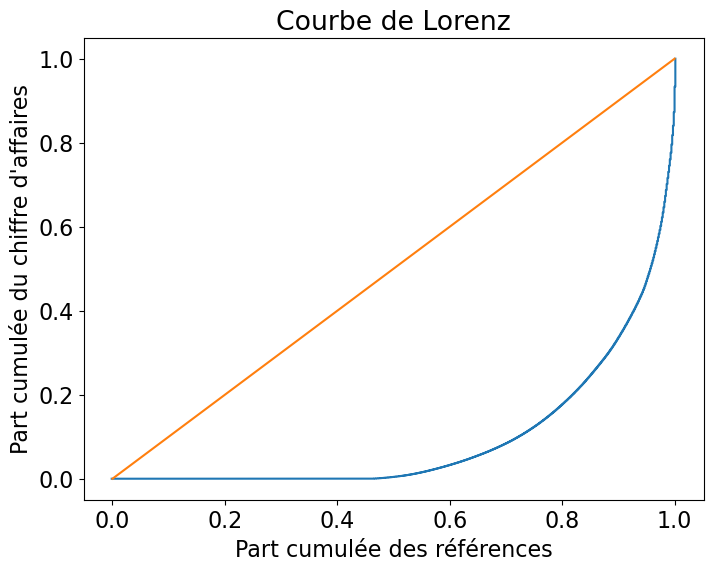

L'indice de gini est de : 0.81


In [48]:
# Données sur le chiffre d'affaire des produits
CA_prod = CA_produit['Chiffre d\'Affaire'].values
n = len(CA_prod)

# Calcul de la courbe de Lorenz
lorenz = np.cumsum(np.sort(CA_prod)) / CA_prod.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

# Paramètres de la figure
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({'font.size': 16})

# Tracé de la courbe de Lorenz et de la bissectrice
xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) 

# Labels des axes et titre de la figure
plt.xlabel('Part cumulée des références')
plt.ylabel('Part cumulée du chiffre d\'affaires')
plt.title('Courbe de Lorenz')

# Affichage de la figure
plt.show()

# Calcul de l'indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S
print('L\'indice de gini est de :',round(gini,2))

#### Interprétation 

## 4.3. Recherches des valeurs abbérantes
↺ [Sommaire](#Sommaire:)

Les outliers, ou valeurs aberrantes, sont des données qui se trouvent à l'extérieur de la distribution normale d'un ensemble de données. Ils peuvent être détectés à l'aide de différentes méthodes, notamment les méthodes <span style ="color:blue"><b>Z-score</b></span> et <span style ="color:blue"><b>Interquartiles</b></span>.

In [49]:
#description de la colonne 'prix'
erp_liaison_web[['prix']].describe()

,prix
count,714.000000
mean,32.493137
std,27.810525
min,5.200000
25%,14.100000
50%,23.550000
75%,42.175000
max,225.000000


# 4.3.1. Valeurs abbérantes: Z-score
↺ [Sommaire](#Sommaire:)

Les outliers Z-score sont identifiés en calculant le Z-score de chaque point de données dans un ensemble de données. Le Z-score mesure le nombre d'écarts-types qu'un point de données se situe par rapport à la moyenne de l'ensemble de données. Les points de données ayant un Z-score supérieur à un seuil prédéfini, généralement 2 ou 3, sont considérés comme des outliers. Les outliers Z-score peuvent être utiles pour identifier les points de données extrêmement rares ou inhabituels dans un ensemble de données.

In [50]:
# Création de la colonne Z-Score basé sur le prix (Z = (x - mean) / std)
erp_liaison_web['Z-Score : prix'] = stats.zscore(erp_liaison_web['prix'])
erp_liaison_web

C:\Users\Dell\AppData\Local\Temp\ipykernel_26552\2986706140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erp_liaison_web['Z-Score : prix'] = stats.zscore(erp_liaison_web['prix'])


,id_produit,SKU,nom_produit,date,vente_web,etat_stock,disponibilité,nb_ventes,prix,Chiffre d'Affaire,Z-Score : prix
0,3847,15298,pierre-jean-villa-saint-joseph-preface-2018,2018-02-08 12:58:52,1,0,outofstock,6.0,24.2,145.2,-0.298410
1,3849,15296,pierre-jean-villa-saint-joseph-tilde-2017,2018-02-08 13:49:41,1,0,outofstock,0.0,34.3,0.0,0.065016
2,3850,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,2018-02-08 14:08:36,1,0,outofstock,0.0,20.8,0.0,-0.420752
3,4032,19814,pierre-jean-villa-igp-gamine-2018,2018-02-09 14:01:05,1,0,outofstock,3.0,14.1,42.3,-0.661837
4,4039,19815,pierre-jean-villa-cote-rotie-carmina-2017,2018-02-12 09:04:37,1,0,outofstock,0.0,46.0,0.0,0.486015
...,...,...,...,...,...,...,...,...,...,...,...
728,6930,16135,mouthes-le-bihan-aime-chai-2015,2020-04-25 13:22:38,1,83,instock,5.0,8.4,42.0,-0.866939
729,7023,15891,camin-larredya-jurancon-sec-la-virada-2018,2020-05-02 14:53:40,1,15,instock,0.0,27.5,0.0,-0.179667
730,7025,15887,jamet-cote-rotie-fructus-voluptas-2018,2020-05-02 15:00:54,1,2,instock,0.0,69.0,0.0,1.313620
731,7247,13127-1,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-06-09 15:42:04,1,23,instock,0.0,54.8,0.0,0.802664


In [51]:
# Tri des valeurs par ordre croissant
erp_liaison_web.sort_values('Z-Score : prix')

,id_produit,SKU,nom_produit,date,vente_web,etat_stock,disponibilité,nb_ventes,prix,Chiffre d'Affaire,Z-Score : prix
664,6129,14570,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,2019-06-28 18:01:06,1,30,instock,0.0,5.2,0.0,-0.982084
98,4173,16211,maurel-pays-doc-chenin-colombard-2019,2018-02-14 17:10:39,1,100,instock,13.0,5.7,74.1,-0.964093
573,5777,14338,maurel-pays-d-oc-cabernet-sauvignon-2017,2019-03-15 10:13:30,1,132,instock,0.0,5.7,0.0,-0.964093
97,4172,16210,maurel-pays-oc-chardonnay-2019,2018-02-14 16:54:33,1,167,instock,43.0,5.7,245.1,-0.964093
99,4174,16209,maurel-cabardes-tradition-2017,2018-02-14 17:15:31,1,94,instock,6.0,5.7,34.2,-0.964093
...,...,...,...,...,...,...,...,...,...,...,...
566,5767,15185,camille-giroud-clos-de-vougeot-2016,2019-03-13 14:43:22,1,12,instock,0.0,175.0,0.0,5.127798
219,4402,3510,cognac-frapin-vip-xo,2018-03-22 11:21:05,1,8,instock,13.0,176.0,2288.0,5.163781
601,5892,14983,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2019-03-28 10:21:36,1,10,instock,3.0,191.3,573.9,5.714318
434,5001,14581,david-duband-charmes-chambertin-grand-cru-2014,2018-07-17 09:45:39,1,20,instock,0.0,217.5,0.0,6.657068


Text(0.5, 0, '')

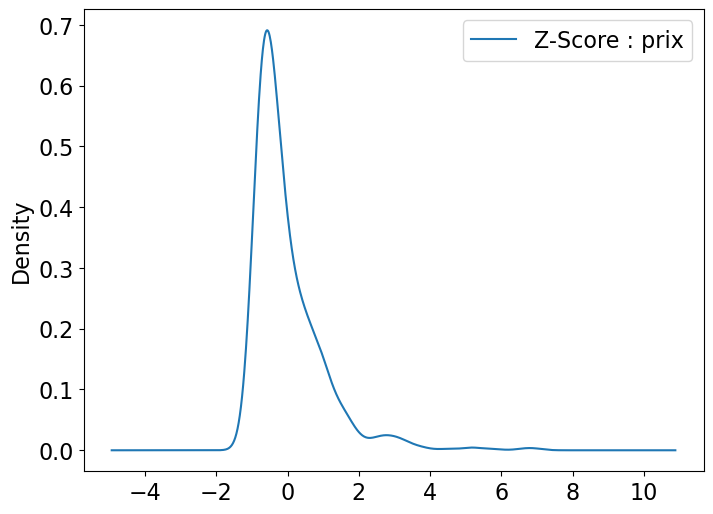

In [52]:
# Graphique de densité du Z-Score
erp_liaison_web.plot(kind='density', y='Z-Score : prix', figsize=(8,6))
plt.xlabel('')

In [53]:
# Calcul du % de l'aire du Z-Score et création de la colonne % Area
erp_liaison_web['% Area : prix'] = stats.norm.cdf(erp_liaison_web['Z-Score : prix'])
erp_liaison_web

C:\Users\Dell\AppData\Local\Temp\ipykernel_26552\1743931893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erp_liaison_web['% Area : prix'] = stats.norm.cdf(erp_liaison_web['Z-Score : prix'])


,id_produit,SKU,nom_produit,date,vente_web,etat_stock,disponibilité,nb_ventes,prix,Chiffre d'Affaire,Z-Score : prix,% Area : prix
0,3847,15298,pierre-jean-villa-saint-joseph-preface-2018,2018-02-08 12:58:52,1,0,outofstock,6.0,24.2,145.2,-0.298410,0.382695
1,3849,15296,pierre-jean-villa-saint-joseph-tilde-2017,2018-02-08 13:49:41,1,0,outofstock,0.0,34.3,0.0,0.065016,0.525919
2,3850,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,2018-02-08 14:08:36,1,0,outofstock,0.0,20.8,0.0,-0.420752,0.336968
3,4032,19814,pierre-jean-villa-igp-gamine-2018,2018-02-09 14:01:05,1,0,outofstock,3.0,14.1,42.3,-0.661837,0.254038
4,4039,19815,pierre-jean-villa-cote-rotie-carmina-2017,2018-02-12 09:04:37,1,0,outofstock,0.0,46.0,0.0,0.486015,0.686522
...,...,...,...,...,...,...,...,...,...,...,...,...
728,6930,16135,mouthes-le-bihan-aime-chai-2015,2020-04-25 13:22:38,1,83,instock,5.0,8.4,42.0,-0.866939,0.192988
729,7023,15891,camin-larredya-jurancon-sec-la-virada-2018,2020-05-02 14:53:40,1,15,instock,0.0,27.5,0.0,-0.179667,0.428707
730,7025,15887,jamet-cote-rotie-fructus-voluptas-2018,2020-05-02 15:00:54,1,2,instock,0.0,69.0,0.0,1.313620,0.905513
731,7247,13127-1,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-06-09 15:42:04,1,23,instock,0.0,54.8,0.0,0.802664,0.788915


In [54]:
# Tri de la table 
erp_liaison_web.sort_values('% Area : prix')

,id_produit,SKU,nom_produit,date,vente_web,etat_stock,disponibilité,nb_ventes,prix,Chiffre d'Affaire,Z-Score : prix,% Area : prix
664,6129,14570,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,2019-06-28 18:01:06,1,30,instock,0.0,5.2,0.0,-0.982084,0.163029
98,4173,16211,maurel-pays-doc-chenin-colombard-2019,2018-02-14 17:10:39,1,100,instock,13.0,5.7,74.1,-0.964093,0.167500
573,5777,14338,maurel-pays-d-oc-cabernet-sauvignon-2017,2019-03-15 10:13:30,1,132,instock,0.0,5.7,0.0,-0.964093,0.167500
97,4172,16210,maurel-pays-oc-chardonnay-2019,2018-02-14 16:54:33,1,167,instock,43.0,5.7,245.1,-0.964093,0.167500
99,4174,16209,maurel-cabardes-tradition-2017,2018-02-14 17:15:31,1,94,instock,6.0,5.7,34.2,-0.964093,0.167500
...,...,...,...,...,...,...,...,...,...,...,...,...
566,5767,15185,camille-giroud-clos-de-vougeot-2016,2019-03-13 14:43:22,1,12,instock,0.0,175.0,0.0,5.127798,1.000000
219,4402,3510,cognac-frapin-vip-xo,2018-03-22 11:21:05,1,8,instock,13.0,176.0,2288.0,5.163781,1.000000
601,5892,14983,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2019-03-28 10:21:36,1,10,instock,3.0,191.3,573.9,5.714318,1.000000
434,5001,14581,david-duband-charmes-chambertin-grand-cru-2014,2018-07-17 09:45:39,1,20,instock,0.0,217.5,0.0,6.657068,1.000000


In [55]:
# Récupération des valeurs abérantes. Supérieur à 99,5% de l'air du Z-Score
outlier = erp_liaison_web[erp_liaison_web['% Area : prix'] > 0.995].sort_values('prix', ascending=False)
outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 200 to 439
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_produit         23 non-null     int64         
 1   SKU                23 non-null     object        
 2   nom_produit        23 non-null     object        
 3   date               23 non-null     datetime64[ns]
 4   vente_web          23 non-null     int64         
 5   etat_stock         23 non-null     int64         
 6   disponibilité      23 non-null     object        
 7   nb_ventes          23 non-null     float64       
 8   prix               23 non-null     float64       
 9   Chiffre d'Affaire  23 non-null     float64       
 10  Z-Score : prix     23 non-null     float64       
 11  % Area : prix      23 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 2.3+ KB


In [56]:
outlier

,id_produit,SKU,nom_produit,date,vente_web,etat_stock,disponibilité,nb_ventes,prix,Chiffre d'Affaire,Z-Score : prix,% Area : prix
200,4352,15940,champagne-egly-ouriet-grand-cru-millesime-2008,2018-03-02 10:30:04,1,0,outofstock,5.0,225.0,1125.0,6.926939,1.000000
434,5001,14581,david-duband-charmes-chambertin-grand-cru-2014,2018-07-17 09:45:39,1,20,instock,0.0,217.5,0.0,6.657068,1.000000
601,5892,14983,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2019-03-28 10:21:36,1,10,instock,3.0,191.3,573.9,5.714318,1.000000
219,4402,3510,cognac-frapin-vip-xo,2018-03-22 11:21:05,1,8,instock,13.0,176.0,2288.0,5.163781,1.000000
566,5767,15185,camille-giroud-clos-de-vougeot-2016,2019-03-13 14:43:22,1,12,instock,0.0,175.0,0.0,5.127798,1.000000
222,4406,7819,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2018-03-22 11:42:48,1,3,instock,0.0,157.0,0.0,4.480108,0.999996
387,4904,14220,domaine-des-croix-corton-charlemagne-grand-cru...,2018-05-15 10:23:41,1,13,instock,5.0,137.0,685.0,3.760451,0.999915
661,6126,14923,champagne-gosset-celebris-vintage-2007,2019-06-28 17:22:27,1,10,instock,2.0,135.0,270.0,3.688486,0.999887
202,4355,12589,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2018-03-02 10:46:10,1,2,instock,11.0,126.5,1391.5,3.382632,0.999641
524,5612,14915,domaine-weinbach-gewurztraminer-gc-furstentum-...,2019-01-15 15:30:49,1,12,instock,0.0,124.8,0.0,3.321461,0.999552


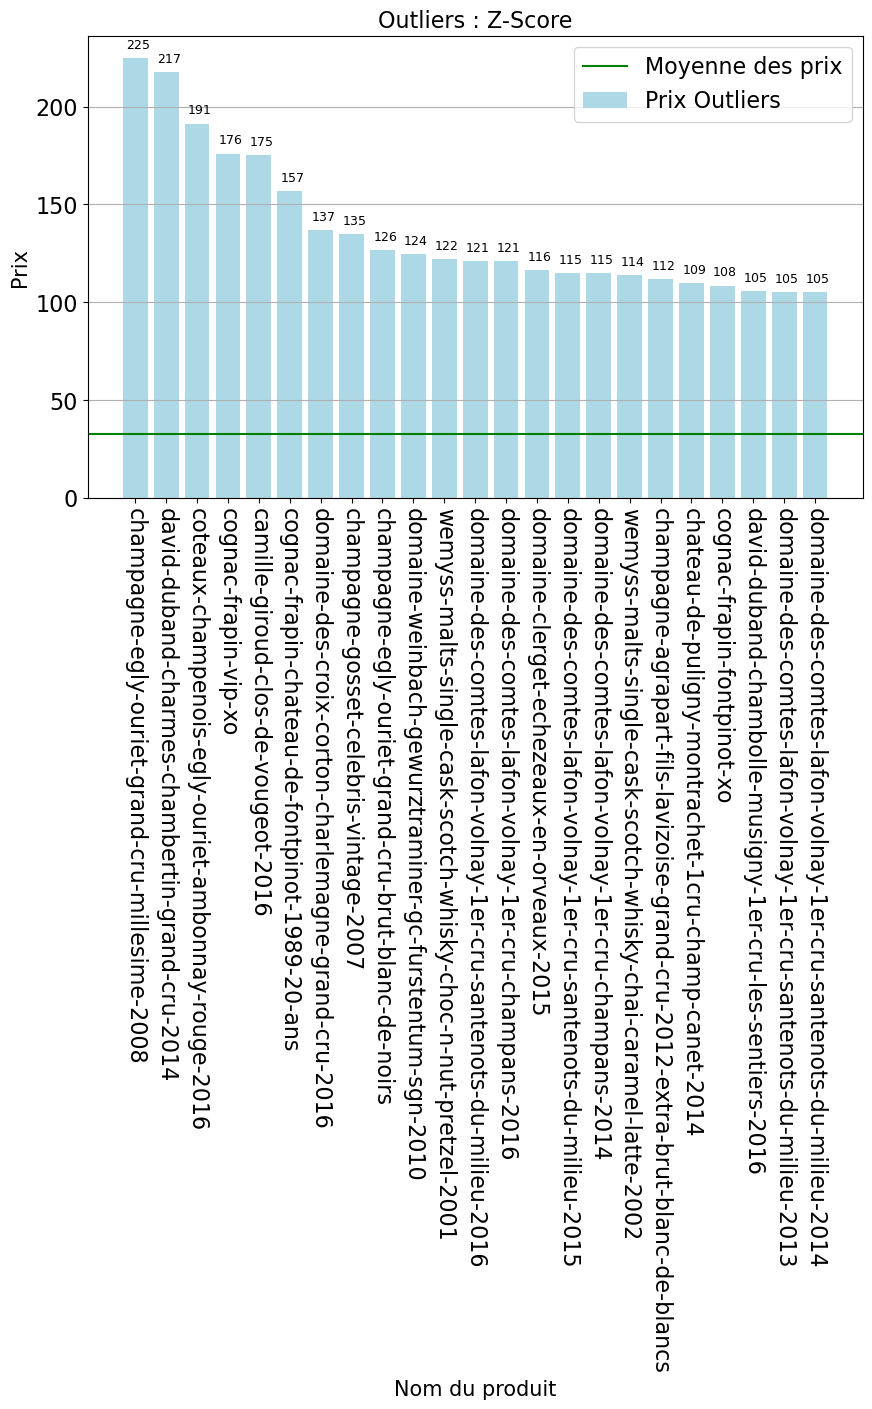

In [57]:
plt.figure(figsize=(10,6))
plt.bar(x=outlier['nom_produit'], height=outlier['prix'], label='Prix Outliers', color='lightblue')
plt.title('Outliers : Z-Score', fontsize=16)
# la moyenne = round(jointur['price'].mean(),1)
plt.axhline(round(erp_liaison_web['prix'].mean(),1), color='g', linestyle='solid', label='Moyenne des prix')
plt.xticks(rotation=-90)
plt.legend()
plt.xlabel('Nom du produit', fontsize=15)
plt.ylabel('Prix', fontsize=15)
plt.grid(axis='y')

# Affichage des valeurs des données sur le graphique
values = outlier['prix'].tolist()
for i in range(23):
    plt.text(i-0.3, values[i]+5, int(values[i]), fontsize=9)

plt.show()

In [58]:
print(outlier['Chiffre d\'Affaire'].sum(),'€ et représente',round(outlier['Chiffre d\'Affaire'].sum()*100/erp_liaison_web['Chiffre d\'Affaire'].sum(),2),'% du chiffre d\'affaire')

6780.4 € et représente 9.61 % du chiffre d'affaire


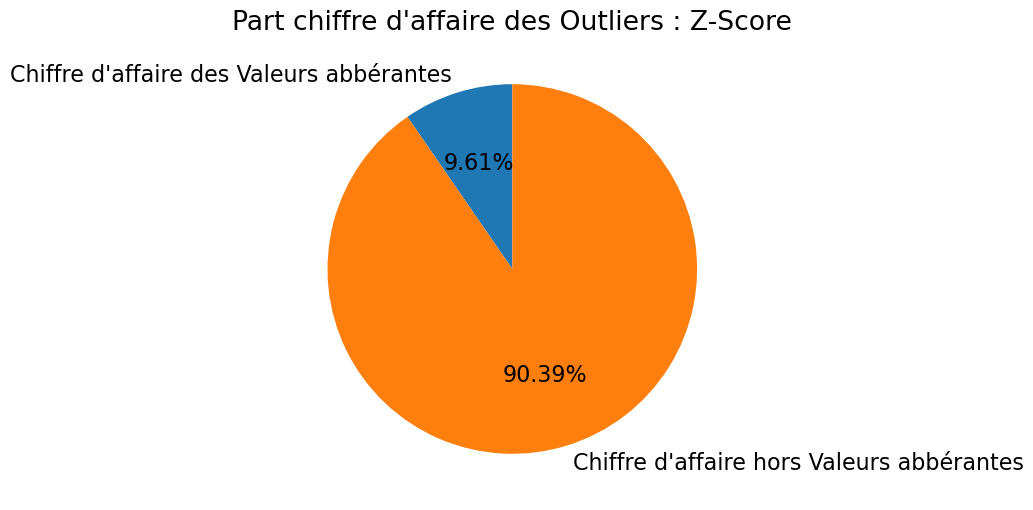

In [59]:
# Données pour le pie chart
labels = ['Chiffre d\'affaire des Valeurs abbérantes', 'Chiffre d\'affaire hors Valeurs abbérantes']
sizes = [outlier['Chiffre d\'Affaire'].sum(), erp_liaison_web['Chiffre d\'Affaire'].sum()-outlier['Chiffre d\'Affaire'].sum()]

# Couleurs pour chaque partie du pie chart
colors = ['orange', 'lightblue']

# Création du pie chart
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)

# Ajout d'un titre
plt.title('Part chiffre d\'affaire des Outliers : Z-Score')

# Affichage du graphique
plt.show()

# 4.3.2. Valeurs abérantes : Inter-quartiles
↺ [Sommaire](#Sommaire:)

Les valeurs abérantes Interquartiles, également appelés valeurs aberrantes IQR, sont des valeurs qui se situent à l'extérieur de la plage interquartile d'un ensemble de données.
<br>Pour identifier les valeurs abérantes Interquartiles, on calcule d'abord la plage interquartile en soustrayant Q1 de Q3. Ensuite, on multiplie la plage interquartile par 1,5 pour obtenir une limite supérieure et une limite inférieure. Les valeurs qui se situent en dessous de la limite inférieure ou au-dessus de la limite supérieure sont considérées comme des valeurs abérantes Interquartiles.
<br>Elles sont utiles pour détecter les valeurs extrêmes dans un ensemble de données et peuvent être utilisées pour identifier les erreurs de mesure ou les valeurs aberrantes qui peuvent fausser l'analyse statistique.

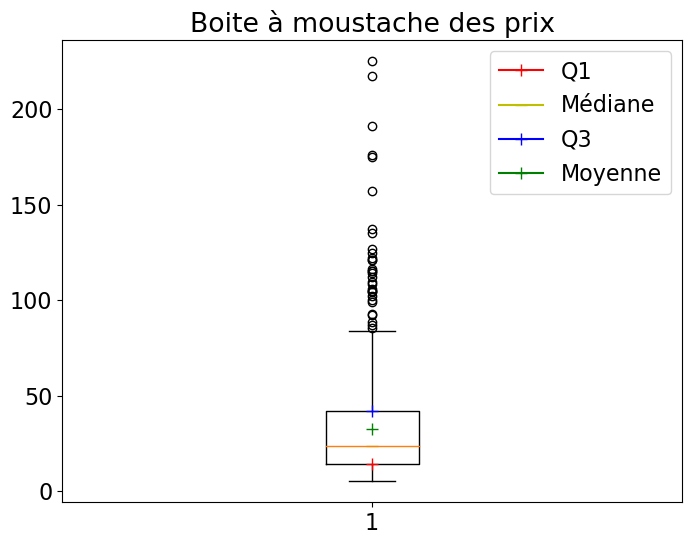

In [60]:
# Tracer un boxplot
fig, ax = plt.subplots()
bp = ax.boxplot(erp_liaison_web['prix'], vert=True)

# Calculer les quartiles, la médiane et la moyenne
q1, median, q3 = np.percentile(erp_liaison_web['prix'], [25, 50, 75])
mean = np.mean(erp_liaison_web['prix'])

# Ajouter des marqueurs pour les quartiles, la médiane et la moyenne
ax.plot(1, q1, marker='+', markersize=8, color='r', label='Q1')
ax.plot(1, median, marker='_', markersize=8, color='y', label='Médiane')
ax.plot(1, q3, marker='+', markersize=8, color='b', label='Q3')
ax.plot(1, mean, marker='+', markersize=8, color='g', label='Moyenne')

# Ajouter des légendes et un titre

ax.legend()
plt.title('Boite à moustache des prix')
plt.show()

In [61]:
# Calcule Q1
q1=erp_liaison_web['prix'].quantile(q=0.25)

# Calcule Q3
q3=erp_liaison_web['prix'].quantile(q=0.75)

# Calcule l'écart interquartile (IQR)
IQR=q3-q1
IQR = round(IQR,3)
IQR

28.075

In [62]:
# Calcul de la borne inférieure à l'aide du Q1 et de l'écart interquartile
borne_inf = q1-1.5*IQR

# Calcul de la borne supérieure à l'aide du Q3 et de l'écart interquartile
borne_sup = q3 +1.5*IQR

#Affichage des valeurs abérantes
erp_liaison_web_sup = erp_liaison_web[erp_liaison_web['prix']>borne_sup]
erp_liaison_web_sup = erp_liaison_web_sup.sort_values('prix', ascending=False)
erp_liaison_web_sup

,id_produit,SKU,nom_produit,date,vente_web,etat_stock,disponibilité,nb_ventes,prix,Chiffre d'Affaire,Z-Score : prix,% Area : prix
200,4352,15940,champagne-egly-ouriet-grand-cru-millesime-2008,2018-03-02 10:30:04,1,0,outofstock,5.0,225.0,1125.0,6.926939,1.000000
434,5001,14581,david-duband-charmes-chambertin-grand-cru-2014,2018-07-17 09:45:39,1,20,instock,0.0,217.5,0.0,6.657068,1.000000
601,5892,14983,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2019-03-28 10:21:36,1,10,instock,3.0,191.3,573.9,5.714318,1.000000
219,4402,3510,cognac-frapin-vip-xo,2018-03-22 11:21:05,1,8,instock,13.0,176.0,2288.0,5.163781,1.000000
566,5767,15185,camille-giroud-clos-de-vougeot-2016,2019-03-13 14:43:22,1,12,instock,0.0,175.0,0.0,5.127798,1.000000
222,4406,7819,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2018-03-22 11:42:48,1,3,instock,0.0,157.0,0.0,4.480108,0.999996
387,4904,14220,domaine-des-croix-corton-charlemagne-grand-cru...,2018-05-15 10:23:41,1,13,instock,5.0,137.0,685.0,3.760451,0.999915
661,6126,14923,champagne-gosset-celebris-vintage-2007,2019-06-28 17:22:27,1,10,instock,2.0,135.0,270.0,3.688486,0.999887
202,4355,12589,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2018-03-02 10:46:10,1,2,instock,11.0,126.5,1391.5,3.382632,0.999641
524,5612,14915,domaine-weinbach-gewurztraminer-gc-furstentum-...,2019-01-15 15:30:49,1,12,instock,0.0,124.8,0.0,3.321461,0.999552


Il n'y a pas de valeurs abbérantes inférieur à la borne inf <b>(comme vu plus haut sur la boite à moustache)

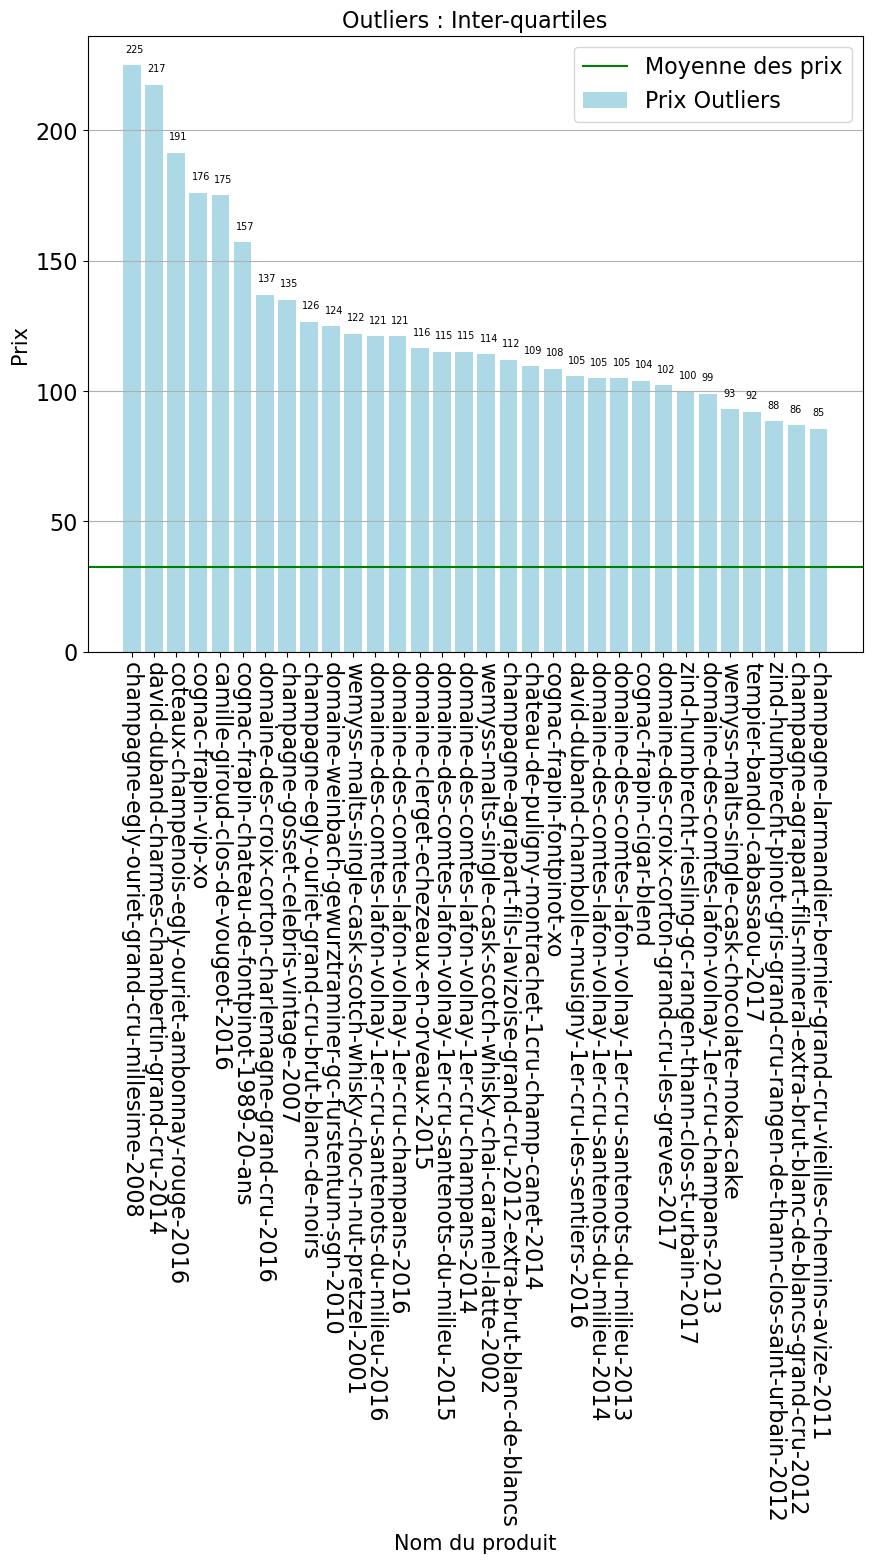

In [63]:
# Représentation graphique des vqleurs abbérantes interquartiles
plt.figure(figsize=(10,8))
plt.bar(x=erp_liaison_web_sup['nom_produit'], height=erp_liaison_web_sup['prix'], label='Prix Outliers', color='lightblue')
plt.title('Outliers : Inter-quartiles', fontsize=16)
plt.axhline(round(erp_liaison_web['prix'].mean(),1), color='g', linestyle='solid', label='Moyenne des prix')
plt.xticks(rotation=-90)
plt.legend()
plt.xlabel('Nom du produit', fontsize=15)
plt.ylabel('Prix', fontsize=15)
plt.grid(axis="y")

# Affichage des valeurs des données sur le graphique
values = erp_liaison_web_sup['prix'].tolist()
for i in range(32):
    plt.text(i-0.3, values[i]+5, int(values[i]), fontsize=7)

plt.show()

In [64]:
# # Chiffre d'affaire total des Outliers:Interquartiles
print(erp_liaison_web_sup['Chiffre d\'Affaire'].sum(),'€ et représente',round(erp_liaison_web_sup['Chiffre d\'Affaire'].sum()*100/erp_liaison_web['Chiffre d\'Affaire'].sum(),2),'% du chiffre d\'affaire')

6970.0 € et représente 9.88 % du chiffre d'affaire


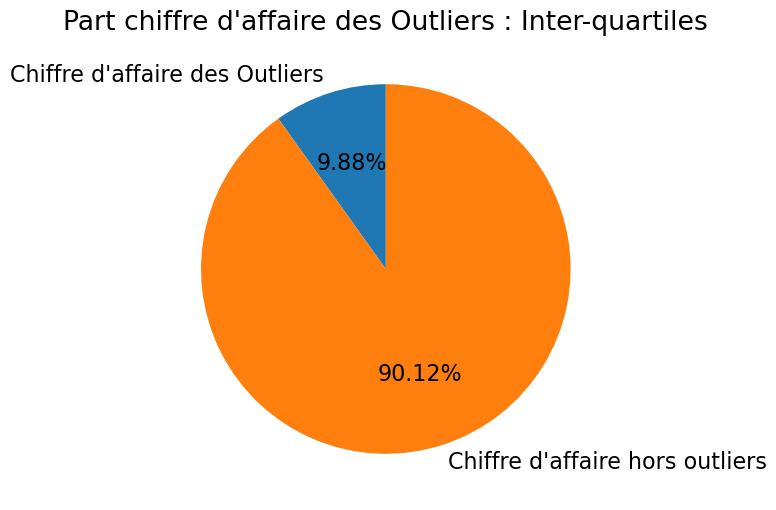

In [65]:
# Données pour le pie chart
labels = ['Chiffre d\'affaire des Outliers', 'Chiffre d\'affaire hors outliers']
sizes = [erp_liaison_web_sup['Chiffre d\'Affaire'].sum(), erp_liaison_web['Chiffre d\'Affaire'].sum()-erp_liaison_web_sup['Chiffre d\'Affaire'].sum()]

# Couleurs pour chaque partie du pie chart
colors = ['orange', 'lightblue']

# Création du pie chart
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)

# Ajout d'un titre
plt.title('Part chiffre d\'affaire des Outliers : Inter-quartiles')

# Affichage du graphique
plt.show()

# 5. Conclusion

<span style="font-size:23px ; text-indent: 50px">
Deux méthodes différentes ont été utilisées pour identifier les valeurs aberrantes dans un ensemble de données. La méthode Z-score a identifié 23 valeurs aberrantes, tandis que la méthode des inter-quartiles en a identifié 32. Cependant, après avoir examiné ces valeurs, il n'a pas été facile de confirmer s'il y avait des erreurs de saisie de prix, car les prix de ces bouteilles de vin semblaient cohérents avec ceux trouvés en ligne (<a href=https://www.enviedechamp.com/fr/champagnes-arretes/2444-grand-cru-millesime-2008.html>https://www.enviedechamp.com/fr/champagnes-arretes/2444-grand-cru-millesime-2008.html</a>). Il est donc recommandé que le client vérifie les prix pour détecter toute éventuelle erreur de saisie.</span>

# ↺ [Sommaire](#Sommaire:)